### 1. Packages 

First, let's run the cell below to import all the packages that you will need.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import parameter

### 2. Dataset

In [2]:
(ds_train, ds_validation), ds_info = tfds.load(
    parameter.DATASET,
    split=['train','validation'],
    data_dir=parameter.datadir,
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
num_classes = 10

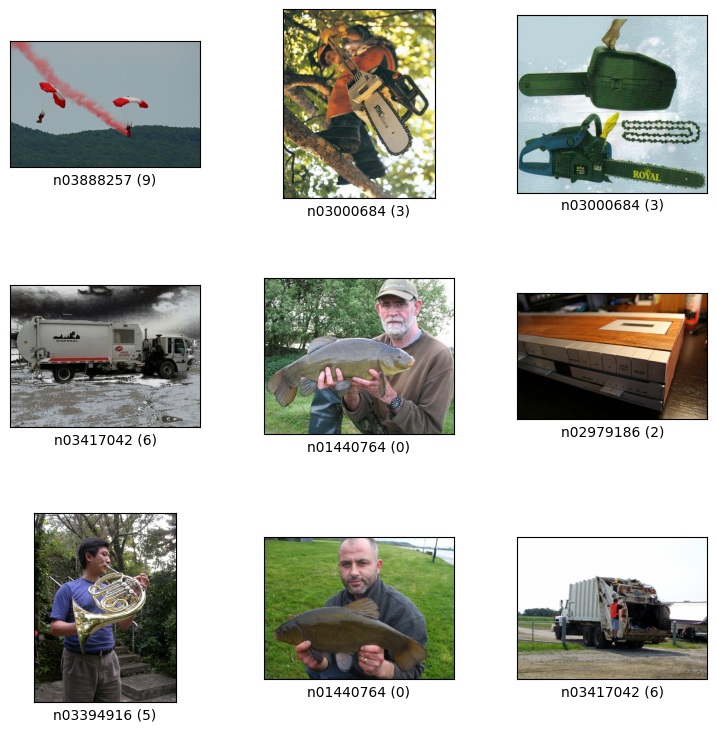

In [3]:
fig = tfds.show_examples(ds_train, ds_info)

In [4]:
def normalize_img(image, label):
    image = tf.image.resize(image, (parameter.IMAGE_SIZE, parameter.IMAGE_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(parameter.BATCH_SIZE)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_validation = ds_validation.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_validation = ds_validation.batch(parameter.BATCH_SIZE)
ds_validation = ds_validation.prefetch(tf.data.experimental.AUTOTUNE)

### 3. Training

In [5]:
import Models.VGG_16_PT

model = Models.VGG_16_PT.Model(parameter.numclassed)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [7]:
# [layer1, layer2, layer3] = model.layers
# W1, b1 = layer1.get_weights()
# W2, b2 = layer2.get_weights()
# W3, b3 = layer3.get_weights()
# print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
# print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
# print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

In [12]:
history = model.fit(
    ds_train,
    epochs=10,
    verbose=2,
)

Epoch 1/10


148/148 - 1215s - loss: 1.6373 - accuracy: 0.4560 - 1215s/epoch - 8s/step
Epoch 2/10
148/148 - 1104s - loss: 1.1524 - accuracy: 0.6252 - 1104s/epoch - 7s/step
Epoch 3/10
148/148 - 1171s - loss: 0.9980 - accuracy: 0.6728 - 1171s/epoch - 8s/step
Epoch 4/10
148/148 - 1184s - loss: 0.9109 - accuracy: 0.7056 - 1184s/epoch - 8s/step
Epoch 5/10
148/148 - 1079s - loss: 0.8470 - accuracy: 0.7251 - 1079s/epoch - 7s/step
Epoch 6/10
148/148 - 860s - loss: 0.8063 - accuracy: 0.7384 - 860s/epoch - 6s/step
Epoch 7/10
148/148 - 849s - loss: 0.7651 - accuracy: 0.7514 - 849s/epoch - 6s/step
Epoch 8/10
148/148 - 853s - loss: 0.7336 - accuracy: 0.7635 - 853s/epoch - 6s/step
Epoch 9/10
148/148 - 867s - loss: 0.7059 - accuracy: 0.7687 - 867s/epoch - 6s/step
Epoch 10/10
148/148 - 876s - loss: 0.6831 - accuracy: 0.7795 - 876s/epoch - 6s/step


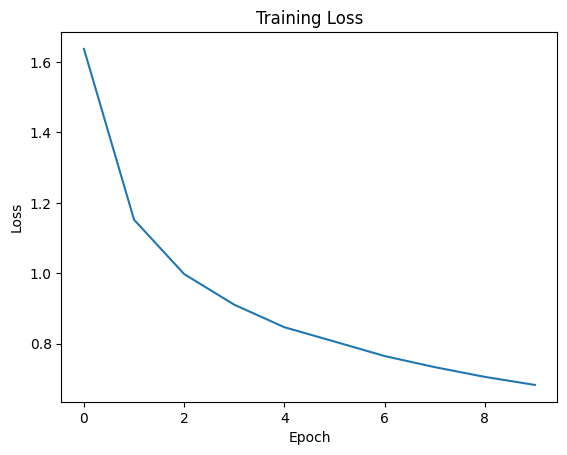

In [13]:
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### 4. Test

In [14]:
model.evaluate(ds_validation)

62/62 [==============================] - 451s 7s/step - loss: 0.7976 - accuracy: 0.7401


[0.7975879907608032, 0.7401273846626282]